In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import citipy
from citipy import citipy as cpy

In [3]:
#import requests
import requests
from datetime import datetime
import time

#improt API key
from config import weather_api_key as key

#build URL for weather map api call
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + key


In [4]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size = 1500)
lngs = np.random.uniform(-90,90, size = 1500)
lat_lngs = zip(lats, lngs)

In [5]:
#add latitudes and longitudes to list
coordinates = list(lat_lngs)

In [6]:
#create list to hold cities
cities = []
#identify nearest city for each lat and lon combo
for coordinate in coordinates:
    city = cpy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is uniquem then add to the cities list
    if city not in cities:
        cities.append(city)

#print city count to comfirm sufficient count
len(cities)

619

In [7]:
#create empty list to hold weather data
city_data = []
#print beginning of logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

#create counters
record_count = 1
set_count = 1

#Loop through all cities in out list
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count =1
    
    #create endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    #log the URL, record, set numberss and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    #Add 1 to the record count
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
#added timer so it doesn't exceed 60 calls per min by accident
    time.sleep(1)

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint george
Processing Record 2 of Set 1 | dhidhdhoo
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | rincon
Processing Record 8 of Set 1 | teya
Processing Record 9 of Set 1 | buenaventura
Processing Record 10 of Set 1 | benguela
Processing Record 11 of Set 1 | pimentel
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | hofn
Processing Record 15 of Set 1 | quatre cocos
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | corinto
Processing Record 18 of Set 1 | cidreira
Processing Record 19 of Set 1 | manglaur
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | umzimvubu
City not foun

Processing Record 37 of Set 4 | klaksvik
Processing Record 38 of Set 4 | bowmore
Processing Record 39 of Set 4 | moron
Processing Record 40 of Set 4 | sondrio
Processing Record 41 of Set 4 | berkovica
Processing Record 42 of Set 4 | qasigiannguit
Processing Record 43 of Set 4 | zelenogorskiy
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | clyde river
Processing Record 46 of Set 4 | potoci
Processing Record 47 of Set 4 | faridpur
Processing Record 48 of Set 4 | mochalishche
Processing Record 49 of Set 4 | ruhengeri
Processing Record 50 of Set 4 | kalat
Processing Record 1 of Set 5 | fomboni
Processing Record 2 of Set 5 | abalak
Processing Record 3 of Set 5 | sambek
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | karasjok
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | banyo
Processing Record 8 of Set 5 | lima
Processing Record 9 of Set 5 | araouane
Process

Processing Record 27 of Set 8 | abu kamal
Processing Record 28 of Set 8 | ancud
Processing Record 29 of Set 8 | gagra
Processing Record 30 of Set 8 | burica
City not found. Skipping...
Processing Record 31 of Set 8 | eskisehir
Processing Record 32 of Set 8 | tessalit
Processing Record 33 of Set 8 | abu samrah
Processing Record 34 of Set 8 | tutoia
Processing Record 35 of Set 8 | gulfport
Processing Record 36 of Set 8 | pindwara
Processing Record 37 of Set 8 | watertown
Processing Record 38 of Set 8 | riachao das neves
Processing Record 39 of Set 8 | callaway
Processing Record 40 of Set 8 | barroualie
City not found. Skipping...
Processing Record 41 of Set 8 | maarianhamina
Processing Record 42 of Set 8 | santa maria
Processing Record 43 of Set 8 | konevo
Processing Record 44 of Set 8 | kyle of lochalsh
City not found. Skipping...
Processing Record 45 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 46 of Set 8 | mattru
Processing Record 47 of Set 8 | shihez

Processing Record 11 of Set 12 | sao jose da coroa grande
Processing Record 12 of Set 12 | chipinge
Processing Record 13 of Set 12 | pombal
Processing Record 14 of Set 12 | jalu
Processing Record 15 of Set 12 | zabol
Processing Record 16 of Set 12 | vicuna
Processing Record 17 of Set 12 | candolim
Processing Record 18 of Set 12 | salumbar
Processing Record 19 of Set 12 | mushabani
Processing Record 20 of Set 12 | kralendijk
Processing Record 21 of Set 12 | staraya kulatka
Processing Record 22 of Set 12 | mayumba
Processing Record 23 of Set 12 | altamira
Processing Record 24 of Set 12 | zanjan
Processing Record 25 of Set 12 | cururupu
Processing Record 26 of Set 12 | matagami
Processing Record 27 of Set 12 | kryva
Processing Record 28 of Set 12 | valparaiso
Processing Record 29 of Set 12 | sakakah
Processing Record 30 of Set 12 | margate
Processing Record 31 of Set 12 | neftcala
Processing Record 32 of Set 12 | hambantota
Processing Record 33 of Set 12 | kongwa
Processing Record 34 of S

In [8]:
len(city_data)

569

In [9]:
#convert array of dicts to a pandas df
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saint George,37.1041,-113.5841,33.53,20,14,1.34,US,2021-06-26 16:34:54
1,Dhidhdhoo,6.8833,73.1000,28.42,71,97,6.62,MV,2021-06-26 16:34:55
2,Ushuaia,-54.8000,-68.3000,4.79,75,0,0.00,AR,2021-06-26 16:34:58
3,Chuy,-33.6971,-53.4616,15.47,85,78,4.37,UY,2021-06-26 16:35:00
4,Salalah,17.0151,54.0924,28.05,89,75,4.63,OM,2021-06-26 16:35:01


In [10]:
#reordering columns
cols_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[cols_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saint George,US,2021-06-26 16:34:54,37.1041,-113.5841,33.53,20,14,1.34
1,Dhidhdhoo,MV,2021-06-26 16:34:55,6.8833,73.1000,28.42,71,97,6.62
2,Ushuaia,AR,2021-06-26 16:34:58,-54.8000,-68.3000,4.79,75,0,0.00
3,Chuy,UY,2021-06-26 16:35:00,-33.6971,-53.4616,15.47,85,78,4.37
4,Salalah,OM,2021-06-26 16:35:01,17.0151,54.0924,28.05,89,75,4.63
5,Rincon,US,2021-06-26 16:30:28,32.2960,-81.2354,31.25,65,75,3.09
6,Teya,RU,2021-06-26 16:35:07,60.3778,92.6267,6.75,96,100,1.36
7,Buenaventura,CO,2021-06-26 16:35:08,3.8801,-77.0312,29.56,65,77,1.90
8,Benguela,AO,2021-06-26 16:35:10,-12.5763,13.4055,23.77,74,71,2.94
9,Pimentel,PE,2021-06-26 16:35:11,-6.8367,-79.9342,22.16,77,75,1.79


In [11]:
#create output file (CSV)
output_data_file = 'weather_data/cities.csv'

#export city_data into csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

## Latitude vs. Temperature

In [21]:
#Extract relevant fields from df for plotting
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

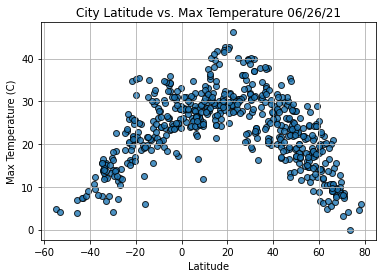

In [35]:
#build scatter plot for lat vs max temp
fig, ax = plt.subplots()
ax.scatter(lats, 
           max_temps, 
           edgecolor='black', lw=1, marker='o', 
           alpha=0.8, label='Cities')

#incorporate graph properties
ax.set_title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
ax.set_ylabel('Max Temperature (C)')
ax.set_xlabel('Latitude')
ax.grid(True)

#save fig
plt.savefig('weather_data/Fig1.png')

#show plot
plt.show()


## Latitude vs Humidity

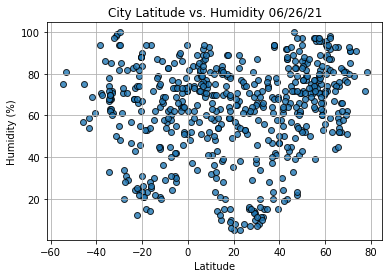

In [39]:
#build scatter plot for lat vs humidity
fig, ax = plt.subplots()
ax.scatter(lats, 
           humidity, 
           edgecolor='black', lw=1, marker='o', 
           alpha=0.8, label='Cities')

#incorporate graph properties
ax.set_title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Latitude')
ax.grid(True)

#save fig
plt.savefig('weather_data/Fig2.png')

#show plot
plt.show()

## Latitude vs Cloudiness

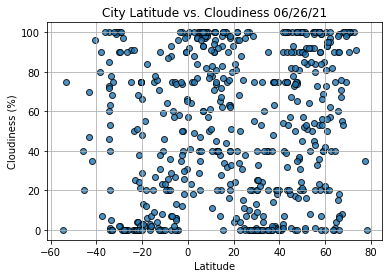

In [40]:
#build scatter plot for lat vs cloudiness
fig, ax = plt.subplots()
ax.scatter(lats, 
           cloudiness, 
           edgecolor='black', lw=1, marker='o', 
           alpha=0.8, label='Cities')

#incorporate graph properties
ax.set_title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
ax.set_ylabel('Cloudiness (%)')
ax.set_xlabel('Latitude')
ax.grid(True)

#save fig
plt.savefig('weather_data/Fig3.png')

#show plot
plt.show()

## Latitude vs Wind Speed

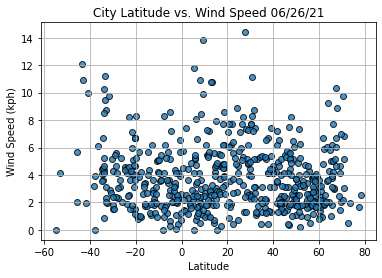

In [41]:
#build scatter plot for lat vs wind speed
fig, ax = plt.subplots()
ax.scatter(lats, 
           wind_speed, 
           edgecolor='black', lw=1, marker='o', 
           alpha=0.8, label='Cities')

#incorporate graph properties
ax.set_title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
ax.set_ylabel('Wind Speed (kph)')
ax.set_xlabel('Latitude')
ax.grid(True)

#save fig
plt.savefig('weather_data/Fig4.png')

#show plot
plt.show()